In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
class randomNos:
    def __init__(self,size,min_num = 1,max_num = 1000):
        self.min_num = min_num
        self.max_num = max_num
        self.size = size
        self.frames = []
        self.colors = []
        self.index = np.arange(size) 
        self.base_colors = ['gray']*self.size
        
    def generate(self):
        '''
        Generate random integers from min_num to max_num and assign it to rand_list
        '''
        self.rand_list = random.sample(range(self.min_num,self.max_num), self.size)
        
        
    def sort(self):
        '''
        Sorts generated random integers in rand_list
        '''
        self.rand_list.sort()
        
    def visualize(self):
        '''
        Create a bar plot of rand_list
        '''
        plt.bar(self.index, self.rand_list,color=self.base_colors)
        plt.xticks([])
        plt.show()
        
    def saveVideo(self,filename = 'bar'):
        '''
        Processes data and converts it into video
        '''
        fig = plt.figure(figsize=(8, 4))
        plt.xticks([])
        rects = plt.bar(self.index, self.frames[0],color=self.colors[0])
        
        def animate(i):
            for rect, yi,c in zip(rects, self.frames[i],self.colors[i]):
                rect.set_height(yi)
                rect.set_color(c)
            return rects

        anim = animation.FuncAnimation(fig, animate, frames=len(x.frames), interval=250)
        anim.save(filename + '.mp4', writer='pillow')
    
    def plot(self):
        HTML("""<video alt="test" controls>
        <source src="bar.mp4" type="video/mp4">
    </video>""")
        
    def lineSearch(self,target):
        self.frames.append(self.rand_list.copy())
        self.colors.append(self.base_colors.copy())
        
        found = False
        i=0
        
        while (found == False) and (i<len(self.rand_list)):
            colors_iter = self.colors[-1]
            if self.rand_list[i] != target:
                colors_iter[i] = 'red'
                
            else:
                colors_iter[i] = 'green'
                found = True
                
            self.colors.append(colors_iter.copy())
            self.frames.append(self.rand_list.copy())    
            i+=1
 
    def binarySearch(self,target):
        self.frames.append(self.rand_list.copy())
        self.colors.append(self.base_colors.copy())

        low = 0
        high = len(self.rand_list)-1
        
        found = False

        while (high>=low) and (found == False):
            mid = ((high-low)//2)+low
            colors_iter = self.colors[-1]
            
            if target == self.rand_list[mid]:
                colors_iter[mid] = 'green'
                found = True
                
                self.colors.append(colors_iter.copy())
                self.frames.append(self.rand_list.copy())
                
            else:
                colors_iter[mid] = 'red'
                self.colors.append(colors_iter.copy())
                self.frames.append(self.rand_list.copy())

                
                colors_iter = self.colors[-1]
                
                if target<self.rand_list[mid]:
                    for j in range(mid,high+1):
                        colors_iter[j] = 'red'
                    high = mid-1

                else:
                    for j in range(low,mid+1):
                        colors_iter[j] = 'red'
                    low = mid+1
                    
                self.colors.append(colors_iter.copy())
                self.frames.append(self.rand_list.copy())

### Line Search

In [3]:
x = randomNos(15)

In [4]:
x.generate()

In [5]:
x.rand_list

[825, 667, 851, 691, 627, 709, 73, 831, 123, 336, 719, 279, 46, 798, 86]

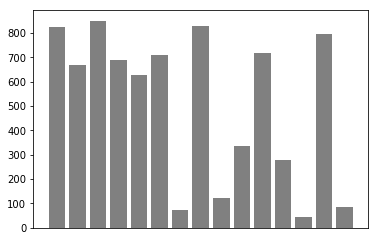

In [6]:
x.visualize()

In [7]:
x.lineSearch(279)

In [8]:
x.saveVideo('line_search')

C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\matplotlib\animation.py:1021: UserWarning: MovieWriter pillow unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


In [9]:
HTML("""<video alt="test" controls>
        <source src="line_search.mp4" type="video/mp4">
        </video>""")
        

### Binary Search

In [38]:
x = randomNos(50)

In [39]:
x.generate()

In [40]:
x.sort()

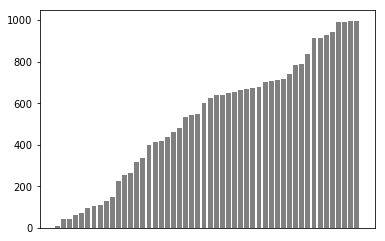

In [34]:
x.visualize()

In [42]:
x.binarySearch(813)

In [43]:
x.saveVideo('binary_search')

C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\matplotlib\animation.py:1021: UserWarning: MovieWriter pillow unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


In [44]:
HTML("""<video alt="test" controls>
        <source src="binary_search.mp4" type="video/mp4">
        </video>""")
        